> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VII: Neural Networks

<div style="text-align: right"> **Due date: Dec. 7, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8 PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[2015142113] [JunYoung Kim]</span> </h2>

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-12-05 19:40:03.031070


## Problem description

We will implement a simple neural network for binary classification. Let me first see a behavior of a simple logistic regression method on a $\text{moon}$ dataset. This dataset has been widely used to test nonlinear classifier and clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
# dataset
np.random.seed(0)
X, y = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

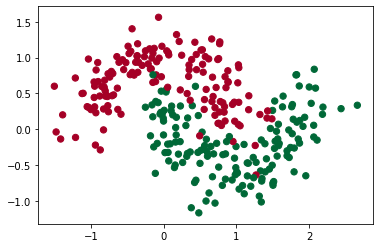

In [4]:
plt.scatter(X[:,0], X[:,1], s = 40, c=y, cmap=plt.cm.RdYlGn)

It seems hard to to classify this dataset with linear classifiers such as a logistic regression method. That is, it is hard to draw a straight line (i.e., decision boundaries) to divide training sets into two different regions pefectly. The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [5]:
import sklearn.linear_model
from P07 import plot_decision_boundary

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use a help function ($\texttt{plot_decision_boundary}$) provided that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers. In logistic regression, it is the output value of sigmoid functions. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are training datasets and color for each label in the dataset, respectively. See the example below.

In [6]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

C:\Users\kjh58\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Logistic Regression')

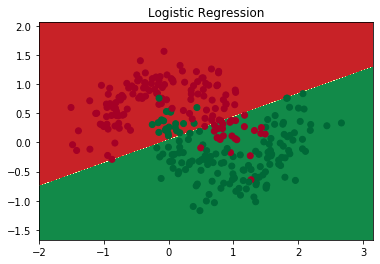

In [7]:
# plot boundary
plot_decision_boundary(pred_func=clf.predict, train_data = X, color = y)
plt.title("Logistic Regression")

As you can see, we need nonlinear classifiers to classify such datasets. Let's implement a simple neural network and check that it gives a nonlinear classifier. The network we will implement consists series of fully connected layers followed by nonlinear activation functions. 

### I. Neural networks using gradiend descent.
(*70 points*) P1.1 Implement a multilayer perceptron method using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset.

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = ReLU(H_1)$ where $ReLU$ is a rectified linear unit and $z_1$ is an output of the first hidden layer. 
 
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = \sigma(H_2)$ where $\sigma$ is a sigmoid function and $z_2$ is an output of the second hidden layer.    
 
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $\hat y = softmax(H_3)$ where $softmax$ is a softmax function and $\hat y$ is an output of the network.
 > The $j$th element of the softmax function is defined as follows.
 >
 > $softmax(h)_j= \frac{\exp^{h_j}}{\sum_{k=1}^{K} \exp^{h_k}}$ for $j=1,\dots,K$,
 >
 > where $h_j$ is the $j$th element of the input vector $h\in \mathcal{R}^K$ and $K$ is the number of class.
 
Note that $softmax$ can be can be seen as a general version of the sigmoid function, and it is typically used for multiclass classification. 
 
 > $W$ and $b$ are weights and bias, respectively.   
 
 > Initialization for weight: Standard normal (use $\texttt{np.random.randn}$.)
 
 > Initialization for bias: 0   
 
 > Input size: 2
 
 > The first hidden layer size: 10
 
 > The second hidden layer size: 10
 
 > Output size: 2
 
 > Loss function: Cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -\sum_{k=1}^K I_k \log(softmax(H_3)_k)$
 >
 > where $I_k$ is an indicator function that has the value of 1 iff the training sample belongs to the class $k$ and 0 otherwise.   
 > Total loss : summation of above for all training samples.   
 >
 > $L_{total} = -\sum_{i=1}^N{\sum_{k=1}^K I^{(i)}_k \log(softmax(H_3^{(i)})_k)}$   
 >
 > where $I^{(i)}$ and $H_3^{(i)}$ are the indicator and the output of the last hidden layer of i-th sample respectively.
 
 > Optimization: Gradient descent
 
 > Learning rate = 0.001
 
 > Number of epochs = 50000

In [8]:
from P07 import build_model, predict

In [9]:
y_onehot = np.eye(X.shape[1])[y]

In [10]:
# input layer dimensionality
nn_input_dim = 2
# output layer dimensionality
nn_output_dim = 2
# first hidden layer dimensionality
nn_hdim1 = 10
# second hidden layer dimensionality
nn_hdim2 = 10
# learning rate 
lr = 0.001 
# epoch number
epoch = 50000

Loss (iteration 1000): 32.035125
Loss (iteration 2000): 28.308372
Loss (iteration 3000): 25.893237
Loss (iteration 4000): 23.770380
Loss (iteration 5000): 22.142126
Loss (iteration 6000): 20.959754
Loss (iteration 7000): 20.007165
Loss (iteration 8000): 19.172789
Loss (iteration 9000): 18.430829
Loss (iteration 10000): 17.780176
Loss (iteration 11000): 17.191476
Loss (iteration 12000): 16.663122
Loss (iteration 13000): 16.155466
Loss (iteration 14000): 15.621571
Loss (iteration 15000): 15.013518
Loss (iteration 16000): 14.315030
Loss (iteration 17000): 13.552116
Loss (iteration 18000): 12.713145
Loss (iteration 19000): 11.843193
Loss (iteration 20000): 11.003085
Loss (iteration 21000): 10.261459
Loss (iteration 22000): 9.612905
Loss (iteration 23000): 9.074164
Loss (iteration 24000): 8.608464
Loss (iteration 25000): 8.202224
Loss (iteration 26000): 7.855370
Loss (iteration 27000): 7.546000
Loss (iteration 28000): 7.266445
Loss (iteration 29000): 7.022518
Loss (iteration 30000): 6.80270

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

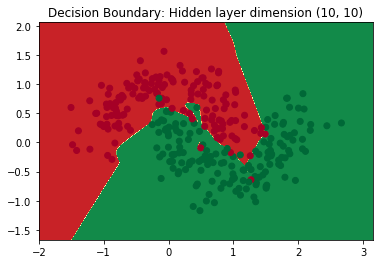

In [11]:
# Build a model with a 3-dimensional hidden layer
model, loss = build_model(X, y_onehot, nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim,
                          lr, epoch, print_loss=True, init_type='randn')
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x), X, y)
plt.title("Decision Boundary: Hidden layer dimension (%d, %d)" % (nn_hdim1, nn_hdim2))

(*5 points*) P1.2 Plot training losses over the number of epochs. 

Text(0, 0.5, 'Training loss')

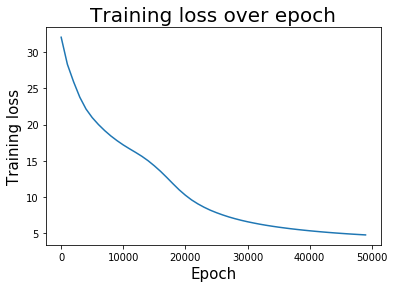

In [12]:
plt.plot(np.arange(len(loss)) * 1000, loss)
plt.title('Training loss over epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Training loss', fontsize=15)

### II. Play with your networks
(*5 points*) P2.1 Change size of hidden layers as follows, and plot decision boundaries. 
(1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are size of first and second hidden layers, respectively. 

In [13]:
from P07 import predict

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


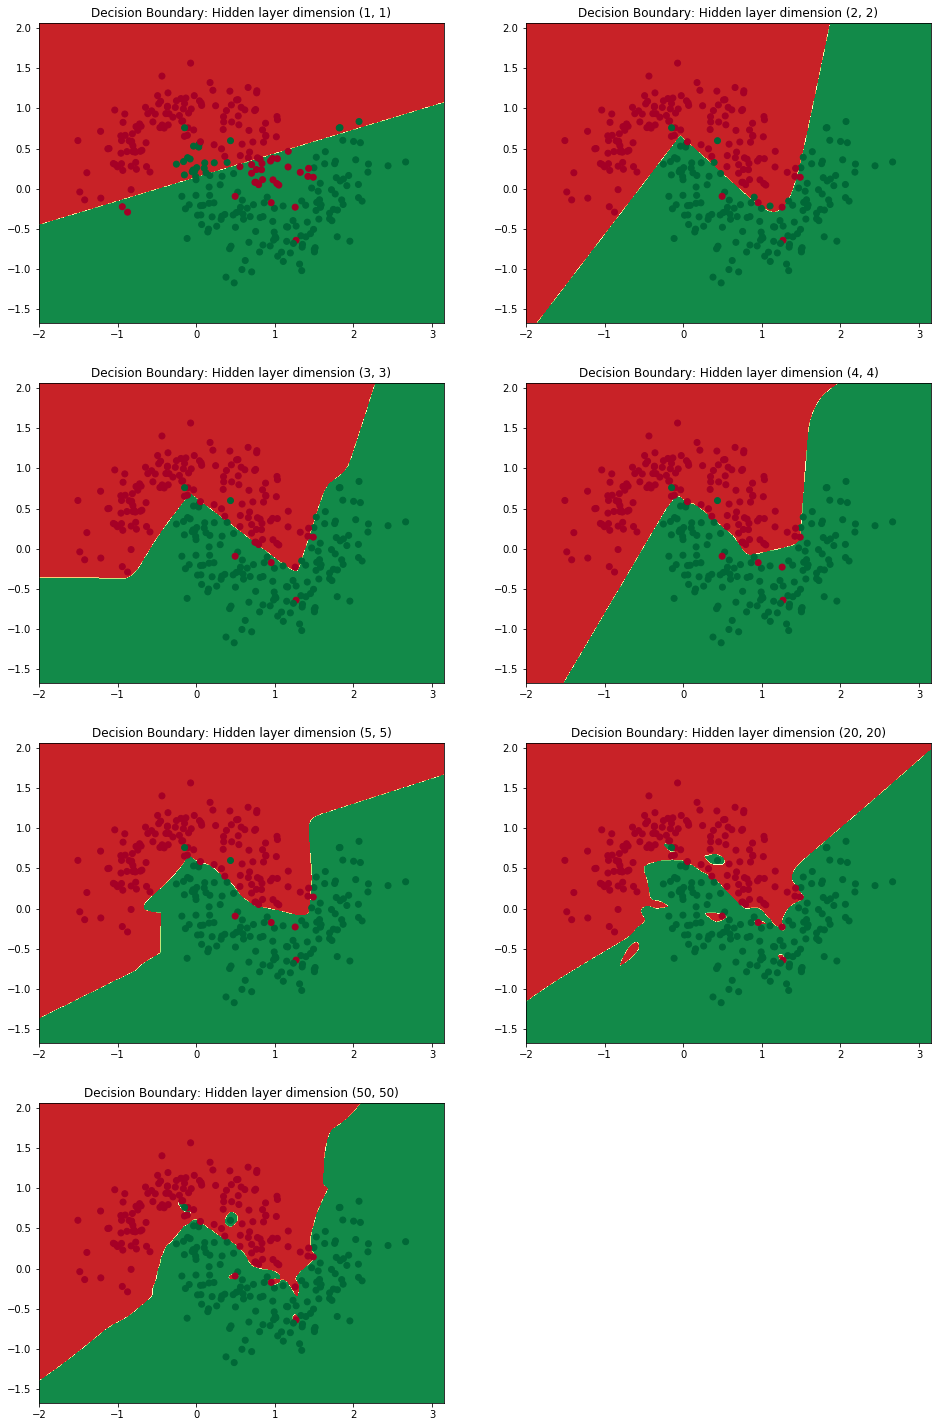

In [14]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title("Decision Boundary: Hidden layer dimension (%d, %d)" % (nn_hdim, nn_hdim))
    model, _ = build_model(X, y_onehot, nn_input_dim, nn_hdim, nn_hdim, nn_output_dim,
                           lr, epoch, False, 'randn')
    plot_decision_boundary(lambda x: predict(model, x), X, y)
    print("Learning NN: Hidden layer dimension (%d, %d) ... done" % (nn_hdim, nn_hdim))
plt.show()

# Result Analysis and Discussion (20 points)

For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Random initialization vs Constant initialization
- Relationship between the number of hidden layers and decision boundary.


### Random initialization vs Constant initialization

Random initialization 방법이 Constant하게 initialization 하였을 때 보다 더 나은 정확도를 가진다. 아래는 parameters를 실제로 constant하게 initialize한 후 model을 만든 결과이다. W1, W2, W3은 모든 원소를 1로, bias들은 모두 0의 원소를 갖도록 initialize하였다. 실제 classification 결과 그래프도 보면 hidden layer로 10개의 dimension을 사용하였음에도 불구하고 linear classifier와 비슷한 결과를 나타냈다. Loss가 특정 수치아래로 거의 내려가지 않는 것을 알 수 있다. 위의 randomly initialize하였을 때의 결과보다 훨씬 높은 수치인 것을 보아 local minimum에 갇혀벼렸음을 추측할 수 있다. 이처럼 적절한 initialization을 해주는 것은 매우 중요하고, 이 initialization에 따라 결과 model이 다르게 나올 수 있는데, 일반적으로 randomly initialization하는게 constant하게 하는 것 보다 local minimum에 빠질 가능성이 더 적고, 실제 결과도 더 잘 나오게 된다. 


Loss (iteration 1000): 142.712887
Loss (iteration 2000): 114.071620
Loss (iteration 3000): 99.317156
Loss (iteration 4000): 99.069042
Loss (iteration 5000): 98.776979
Loss (iteration 6000): 98.492363
Loss (iteration 7000): 98.243585
Loss (iteration 8000): 98.036327
Loss (iteration 9000): 97.861875
Loss (iteration 10000): 97.714461
Loss (iteration 11000): 97.589208
Loss (iteration 12000): 97.462806
Loss (iteration 13000): 97.385586
Loss (iteration 14000): 97.306704
Loss (iteration 15000): 97.238177
Loss (iteration 16000): 97.178082
Loss (iteration 17000): 97.124944
Loss (iteration 18000): 97.077619
Loss (iteration 19000): 97.035204
Loss (iteration 20000): 96.996977
Loss (iteration 21000): 96.962353
Loss (iteration 22000): 96.930683
Loss (iteration 23000): 96.901849
Loss (iteration 24000): 96.874675
Loss (iteration 25000): 96.850233
Loss (iteration 26000): 96.827911
Loss (iteration 27000): 96.801229
Loss (iteration 28000): 96.787567
Loss (iteration 29000): 96.769917
Loss (iteration 30000

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

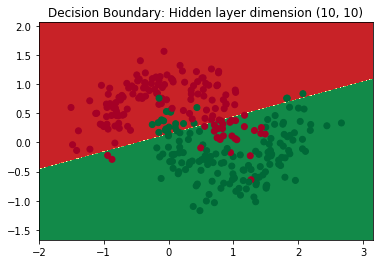

In [15]:
model2, loss2 = build_model(X, y_onehot, nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim,
                          lr, epoch, print_loss=True, init_type='const')
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model2, x), X, y)
plt.title("Decision Boundary: Hidden layer dimension (%d, %d)" % (nn_hdim1, nn_hdim2))

### Relationship between the number of hidden layers and decision boundary

P2.1의 결과에서 확인할 수 있듯이, hidden layer의 dimension 수가 늘어날수록, decision boundary는 training sample들에 대해 더 정확하게 그려진다. dimension이 1일때는 linear classifier처럼 직선의 형태로 decision boundary를 설정하였다. 이 상황은 model이 underfitting이 되었다고 생각할 수 있다. dimension이 50일때는 각 label에 속하는 sample들을 예외없이 모두 정확하게 나누는 decision boundary가 그려진 것을 알 수 있다. 하지만 이 문제는 Overfitting Problem을 야기 할 수 있다. 따라서 적절한 수의 갯수를 정해 사용하는 것이 중요하다.